<a href="https://colab.research.google.com/github/mvoassis/simple-linear-regression/blob/main/Regressao_Linear_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Linear Regression</h1>

#### Marcos Oliveira (mvoassis@gmail.com)

# <font color='red' style='font-size: 30px;'>Dataset</font>
<hr style='border: 2px solid red;'>

## Importing libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset and the project
<hr>

### Source: https://www.kaggle.com/greenwing1985/housepricing

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>The objective is to create a machine learning model, using Linear Regression, to predict house pricing based on a set of known features.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A computer-generated dataset available in Kaggle will be used for machine learning training.</p>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>prices</b> - House prices</li>
    <li><b>area</b> - House area</li>
    <li><b>parking</b> - Number of available parking slots</li>
    <li><b>bathrooms</b> - Number of bathrooms</li>
    <li><b>fireplace</b> - Number of fireplaces</li>
    <li><b>marble</b> - If the house have details in white marbler (1) or not(0) </li>
    <li><b>floors</b> - If the house have more than one floor (1) or not (0).</li>
</ul>

## Dataset reading


In [8]:
data = pd.read_csv('HousePrices_HalfMil.csv',sep=';')

## Dataset visualization


In [9]:
column_names = { 'precos':'price',
                'area': 'area',
                'garagem':'parking',
                'banheiros':'bathrooms',
                'lareira':'fireplace',
                'marmore':'marble',
                'andares':'floors'}

data.rename(columns=column_names,inplace=True)
data.head()

,price,area,parking,bathrooms,fireplace,marble,floors
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Dataset size

In [10]:
data.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Preliminary analysis</font>
<hr style='border: 2px solid red;'>

## Descriptive statistics

In [11]:
data.describe().round(2)

,price,area,parking,bathrooms,fireplace,marble,floors
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Correlation Matrix


In [12]:
data.corr()

,price,area,parking,bathrooms,fireplace,marble,floors
price,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
parking,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
bathrooms,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
fireplace,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marble,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
floors,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


In [13]:
data.corr()[['price']][1:].T

,area,parking,bathrooms,fireplace,marble,floors
price,0.117689,0.102752,0.12439,0.107209,0.430767,0.631529


### Regarding the correlations:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>The features floors and marble are the most correlated with the dependent variable (Price). It is a positive correlation, which means that if a house have these features, it tends to be more expensive.</li>
    <li>There is not a strong correlation between the explanatory variables.</li>
</ul>

# <font color='red' style='font-size: 30px;'>Behavior of the dependant variable (Y)</font>
<hr style='border: 2px solid red;'>

# Graphic analysis

## Seaborn configuration - style and color

In [14]:
sns.set_palette('Accent')

sns.set_style('darkgrid')

## Box plot of the dependant variable (y)

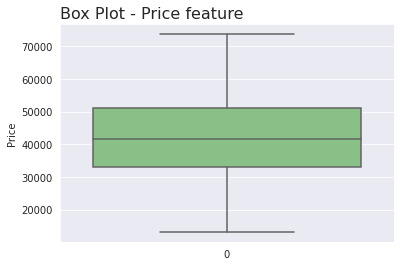

In [15]:
ax = sns.boxplot(data=data['price'], orient='v')
ax.set_title('Box Plot - Price feature', fontsize=16, loc='left')
ax.set_ylabel('Price')
ax=ax

### Insights:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>It seems to be a well defined dataset, with no outliers.</li>
    <li>Most house prices seem to be on the interval from $32,000 to $51,000.</li>
</ul>

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

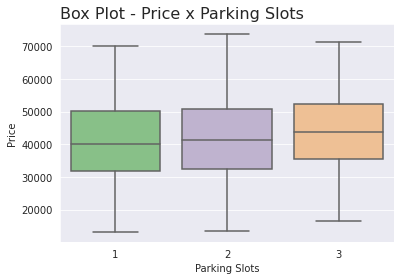

In [16]:
ax = sns.boxplot(data=data, y='price', x='parking')
ax.set_title('Box Plot - Price x Parking Slots', fontsize=16, loc='left')
ax.set_ylabel('Price')
ax.set_xlabel('Parking Slots')
ax=ax

### Box-plot (Preço X Banheiros)

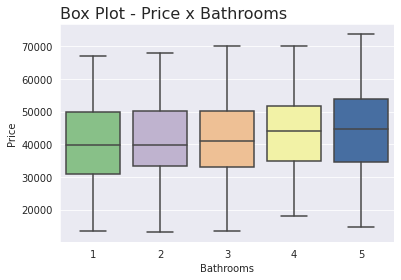

In [17]:
ax = sns.boxplot(data=data, y='price', x='bathrooms')
ax.set_title('Box Plot - Price x Bathrooms', fontsize=16, loc='left')
ax.set_ylabel('Price')
ax.set_xlabel('Bathrooms')
ax=ax

### Box-plot (Preço X Lareira)

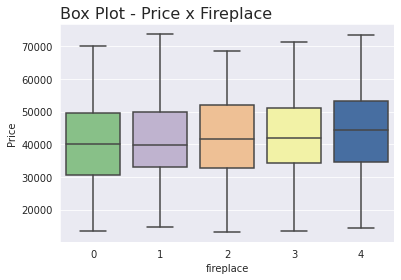

In [18]:
ax = sns.boxplot(data=data, y='price', x='fireplace')
ax.set_title('Box Plot - Price x Fireplace', fontsize=16, loc='left')
ax.set_ylabel('Price')
ax.set_xlabel('fireplace')
ax=ax

### Box-plot (Preço X Acabamento em Mármore)

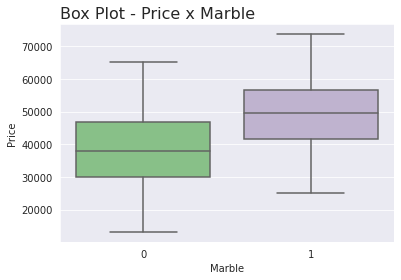

In [19]:
ax = sns.boxplot(data=data, y='price', x='marble')
ax.set_title('Box Plot - Price x Marble', fontsize=16, loc='left')
ax.set_ylabel('Price')
ax.set_xlabel('Marble')
ax=ax

### Box-plot (Preço X Andares)

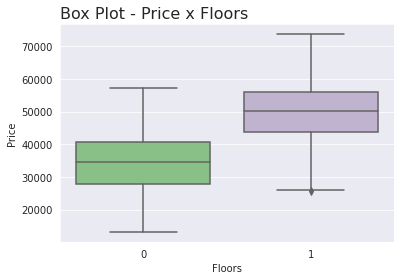

In [20]:
ax = sns.boxplot(data=data, y='price', x='floors')
ax.set_title('Box Plot - Price x Floors', fontsize=16, loc='left')
ax.set_ylabel('Price')
ax.set_xlabel('Floors')
ax=ax

## Frequency distribution of the dependant variable (y)



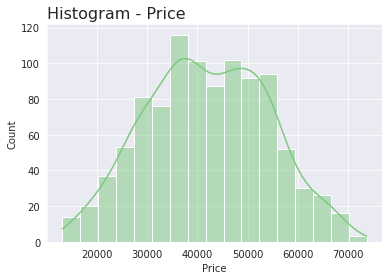

In [21]:
ax = sns.histplot(data=data['price'],kde=True)
ax.set_title('Histogram - Price', fontsize=16, loc='left')
ax.set_ylabel('Count')
ax.set_xlabel('Price')
ax=ax

### Insights:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Although it is not a perfect normal distribution, it seems to be a symmetric distribution.</li>
    <li>The dataset have few registries. Increasing the dataset size should result in a normal distribution.</li>
</ul>

## Scatter plots between dataset variables

### Plotting the pairplot by fixing only one variable on the y-axis

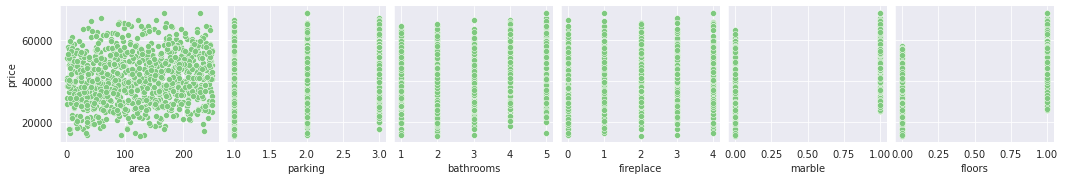

In [22]:
ax = sns.pairplot(data=data, y_vars='price', x_vars=['area','parking','bathrooms','fireplace','marble','floors'])

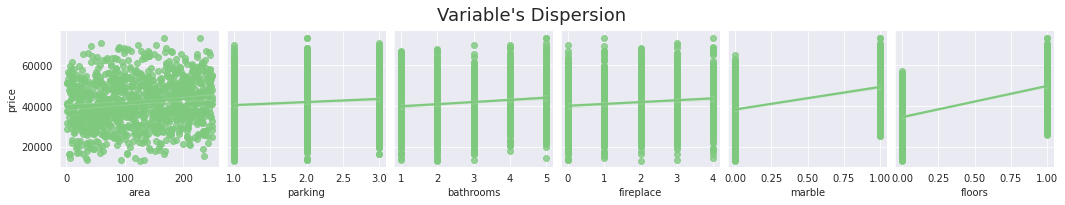

In [23]:
ax = sns.pairplot(data=data, y_vars='price', x_vars=['area','parking','bathrooms','fireplace','marble','floors'],kind='reg')
ax.fig.suptitle('Variable\'s Dispersion',fontsize=18,y=1.1)
ax=ax

In [24]:
data.corr()

,price,area,parking,bathrooms,fireplace,marble,floors
price,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
parking,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
bathrooms,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
fireplace,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marble,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
floors,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


### Insights:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>It seems to be a linear correlation between price and the features marble and floors. </li>
    <li>Although there is a correlation on the other features, it is not as strong as mable and floors features.</li>
    <li>The results are compatible with the correlation matrix</li>
</ul>

# <font color='red' style='font-size: 30px;'>Estimating a Linear Regression Model</font>
<hr style='border: 2px solid red;'>

## Importing *train_test_split* from *scikit-learn*

In [25]:
from sklearn.model_selection import train_test_split

## Creating pandas variables for the independent (y) and explanatory variables (X)

In [26]:
y = data['price']

In [27]:
X = data[['area', 'parking', 'bathrooms', 'fireplace', 'marble', 'floors']]
# X = data[['fireplace', 'marble', 'floors']]
# X = data[['marble', 'floors']]

## Creating train and test datasets 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

## Importing *LinearRegression* and *metrics* from *scikit-learn*

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instantiating the *LinearRegression()* class

In [30]:
model = LinearRegression()

## Fitting the model with train dataset


In [31]:
model.fit(X_train,y_train)

LinearRegression()

## Obtaining the coefficient of determination (R²) of the estimated model with the TRAINING data


In [32]:
print('R² score: {}'.format(model.score(X_train,y_train).round(2)))

R² score: 0.65


## Generating predictions for the TEST data (X_test) using the *predict()* method

In [33]:
y_pred = model.predict(X_test)

## Getting the coefficient of determination (R²) for our model predictions

In [34]:
print('R² score: {}'.format(metrics.r2_score(y_test,y_pred).round(2)))

R² score: 0.64


# <font color='red' style='font-size: 30px;'>Getting Punctual Forecasts</font>
<hr style='border: 2px solid red;'>

## Creating a simple simulator

In [35]:
area = 40
parking = 1
bathrooms = 2
fireplace = 0
marble = 1
floors = 1
input = pd.DataFrame([[area, parking, bathrooms, fireplace, marble, floors]], columns=['area', 'parking', 'bathrooms', 'fireplace', 'marble', 'floors'])
# input = pd.DataFrame([[marble, floors]], columns=['marble','floors'])

print('Price: $ {0:.2f} '.format(model.predict(input)[0]))


Price: $ 67013.92 


In [42]:
#importing libraries
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Creating form controls
area = widgets.Text(description="Area")
parking = widgets.Text(description="Parking Slots")
bathrooms = widgets.Text(description="Bathrooms")
fireplace = widgets.Text(description="Fireplace")
marble = widgets.Text(description="Marble?")
floors = widgets.Text(description="Floors?")

button = widgets.Button(description="Predict")

# Positioning the controls
left = VBox([area, bathrooms, marble])
right = VBox([parking, fireplace, floors])
inputs = HBox([left, right])

# Prediction function
def simulator(sender):
    input_values = pd.DataFrame([[
                           float(area.value if area.value else 0), 
                           float(parking.value if parking.value else 0),
                           float(bathrooms.value if bathrooms.value else 0),
                           float(fireplace.value if fireplace.value else 0), 
                           float(marble.value if marble.value else 0), 
                           float(floors.value if floors.value else 0)]], columns=['area', 'parking', 'bathrooms', 'fireplace', 'marble', 'floors'])

    print('\n$ {0:.2f}\n'.format(model.predict(input_values)[0]))
    
# Assigning the "simulator" function to the button's click event
button.on_click(simulator)  

In [43]:
display(inputs, button)

Button(description='Predict', style=ButtonStyle())


$ 37443.65



# <font color='red' style='font-size: 30px;'>Regression Metrics</font>
<hr style='border: 2px solid red;'>

## Metrics
<hr>

*   Mean Square Error (MSE)
*   Root Mean Square Error (SMSE)
*   Determination Coefficient - R²


In [38]:
MSE = metrics.mean_squared_error(y_test, y_pred).round(2)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred).round(2)

pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame([MSE, RMSE, R2], ['MSE', 'RMSE', 'R²'], columns=['Metrics'])

,Metrics
MSE,52513740.80
RMSE,7246.64
R²,0.64


# <font color='red' style='font-size: 30px;'>Saving and Loading the Estimated Model</font>
<hr style='border: 2px solid red;'>

## Importing pickle library

In [39]:
import pickle

## Saving the prediction model

In [40]:
output = open('house_prices_regression','wb')
pickle.dump(model,output)
output.close()

## Loading the prediction model

In [41]:
model_saved = open('house_prices_regression','rb')
model_new = pickle.load(model_saved)
model_saved.close()